#1. 시각화를 위한 라이브러리 설치

- using graphviz    
pip install -q pydot

- 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌.    
pip install pygraphviz   


- Graphviz 공식 사이트 : https://graphviz.org/download/   
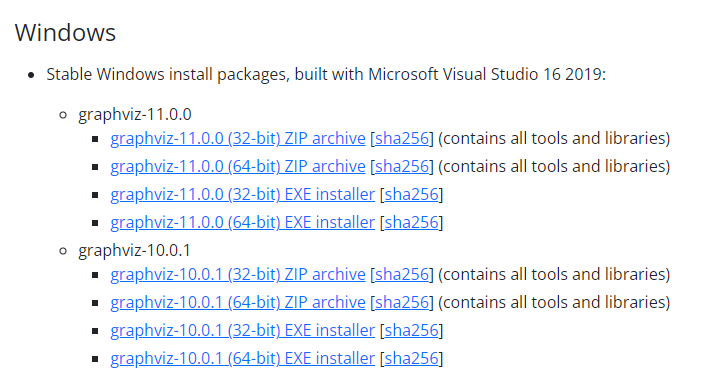

> 복붙만 해도 됨

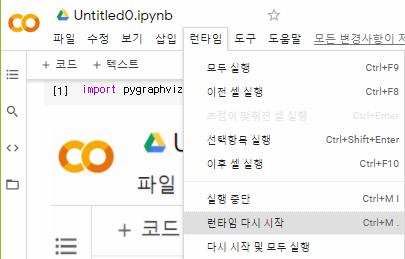

> 설치 완료 후 런타임 -> 런타임 다시 시작 실행

#2. 결정 트리

##2.1 데이터 추출
> iris 데이터를 읽어 들여 훈련데이터와 테스트 데이터를 7:3으로 분리하여 추출하시오

> 훈련 데이터와 검증 데이터를 받기 위해 train_test_split 함수를 이용한다. 데이터, 결과 데이터, 검증데이터 비율, 랜덤값 순으로 파라미터를 입력하면 되며 반환값은 훈련 데이터, 검증 데이터, 훈련 결과 데이터, 검증 결과 데이터 순으로 반환된다.

##2.2 모델 학습

##2.3 시각화

###2.3.1 그래프 생성

> export_graphviz 함수는 그래프로 시각화 하기 위한 출력 파일을 생성한다.
- decision_tree : 첫 인자로 학습이 완료된 모델이다.
- out_file : 그래프를 그릴 파일명을 지정한다.
- class_names : target_name을 지정한다ㅏ.
- feature_names : feature_name을 지정한다.
- impurity 기본값은 False이며 True일 경우 노드의 클래스가 구분되도록 색을 칠한다.
- filled : True 시 불순율 표시(gini)

###2.3.2 파일 확인

>ls는 리눅스 명령어로 현재 경로의 디렉토리 및 파일을 보여준다.

###2.3.3 그래프 출력

> 각 노드별로 다음과 같은 의미를 갖는다.
- 첫 번째 나타나는 조건식은 다음 내용을 분류하기 위한 기준이 된다.
- gini는 여러 종류의 데이터가 섞여 있는 비율을 의미하며 0이면 하나의 종류만 있는 것이다.
- samples는 데이터의 개수를 의미한다.
- value는 데이터의 종류별 건수를 의미하다.
- class는 최종 분류 결과이다.

> 루트 노드에서 꽃잎의 폭이 0.8이하이면 setosa이다. 

> 두 번째 노드에서 꽃잎의 폭이 1.65 초과이면 virginica이다. 

> 세 번째 노드에서 꽃잎의 길이가 5이하이면 versicolor이다. 5초과인 경우 samples의 수가 4이므로 더 분류를 안하는 것이 좋다. 더 나뉘게 되면 과적합되어 예측률이 떨어 질 수 있다. 

위의 내용을 기반으로 잘 분석하여 적당한 파라미터를 지정하고 성능 높은 모델을 생성하면 된다.

##2.4 과적합 해소

##2.5 feature 중요도

###2.5.1 feature 중요도 확인

> feature_importances_는 feature의 중요도를 뜻하는 것으로 수치가 클 수록 중요한 feature이다. 중요도가 높은 feature를 우선적으로 루트에서 분류하고 점차 낮은 feature로 분류를 마무리하게 된다.

###2.5.2 시각화